In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
plt.style.use('seaborn')
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
l_of_col = []
for column in df.columns[2:]:
    l_of_col.append(column)

In [5]:
data = df[l_of_col].copy()
display(data)
data.info()
print(data.sqft_basement.value_counts(normalize=True))
data = data[data.sqft_basement != '?']
data.sqft_basement = data.sqft_basement.astype('float64')
#sqftb = data.loc[data.sqft_basement != '?', data.columns]
#sqftb.sqft_basement = sqftb.sqft_basement.astype('float64')
#data.sqft_basement = data.sqft_basement.replace('?', sqftb.sqft_basement.median())
#data.sqft_basement = data.sqft_basement.astype('float64')
print(data.waterfront.unique())
print(data.view.unique())
print(data.yr_renovated.unique())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB
0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.0

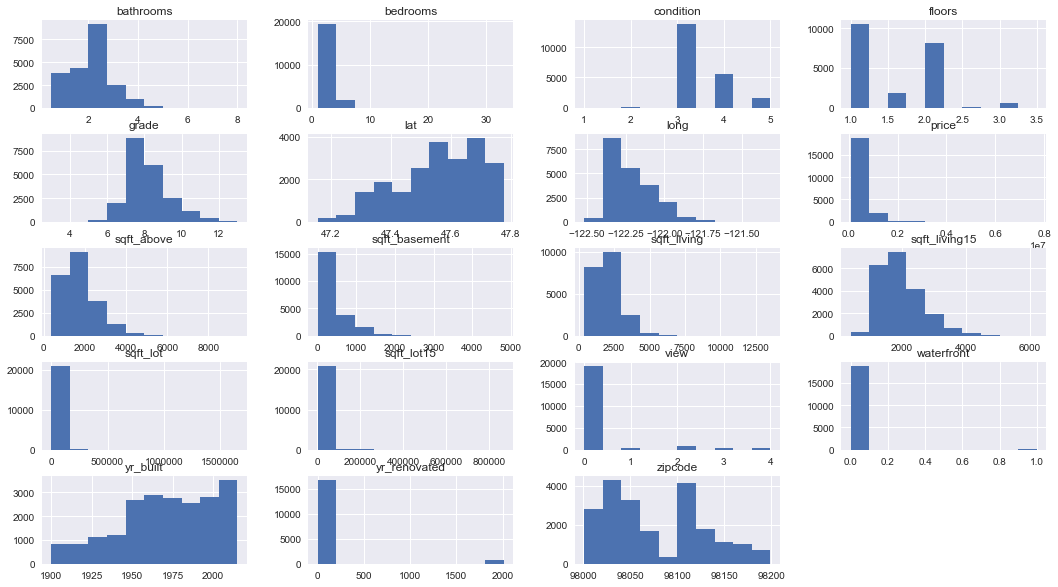

In [6]:
data.hist(figsize=(18,10) );

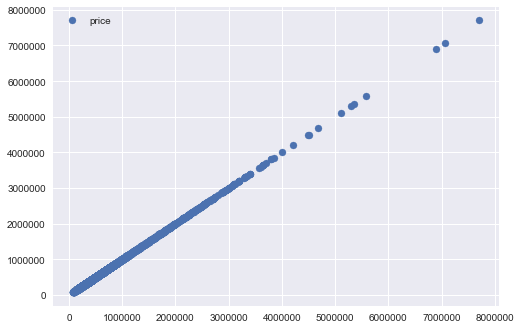

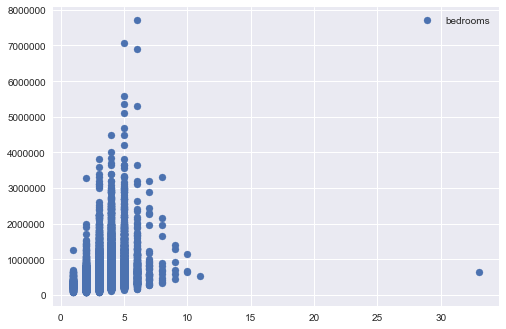

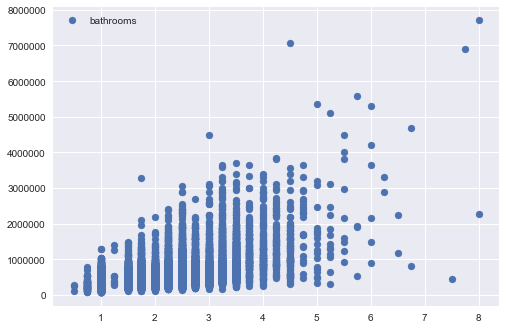

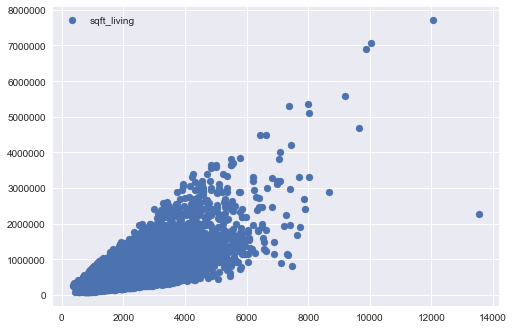

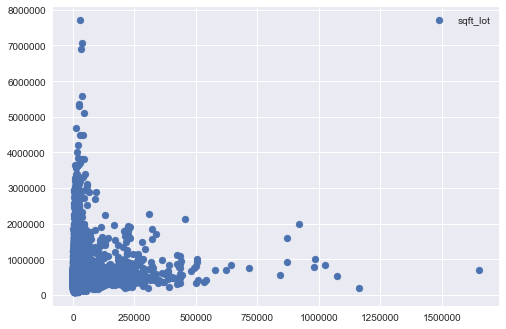

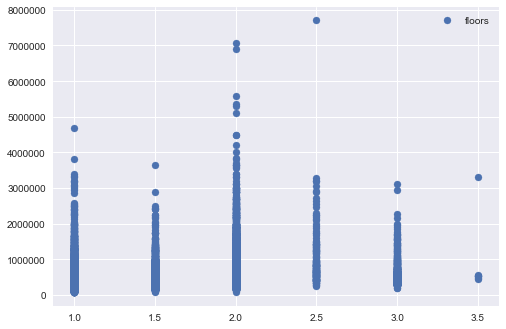

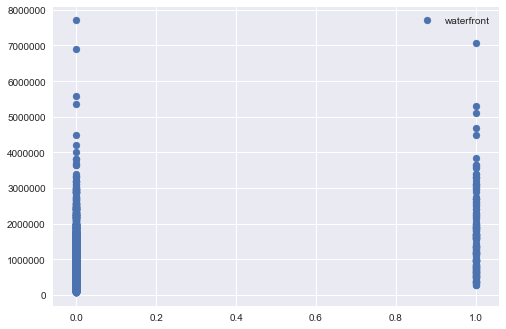

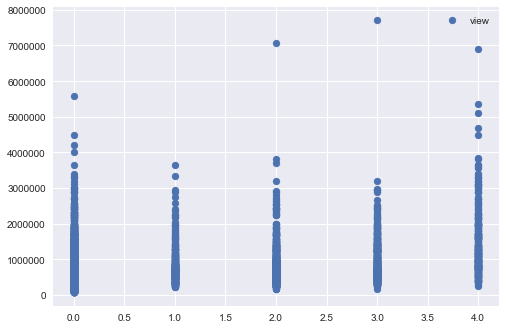

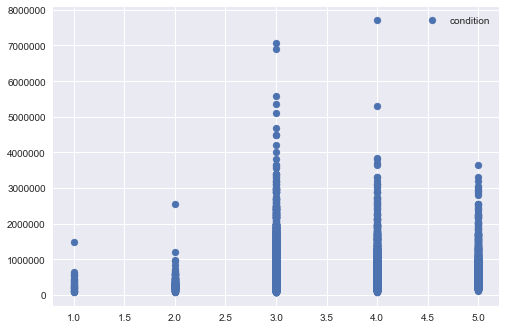

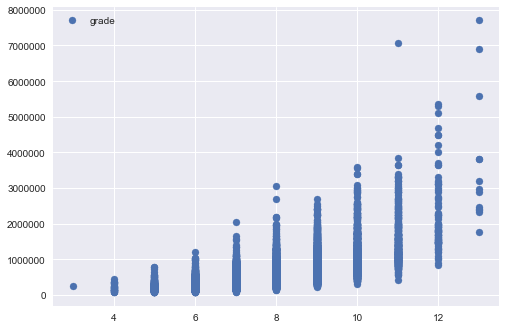

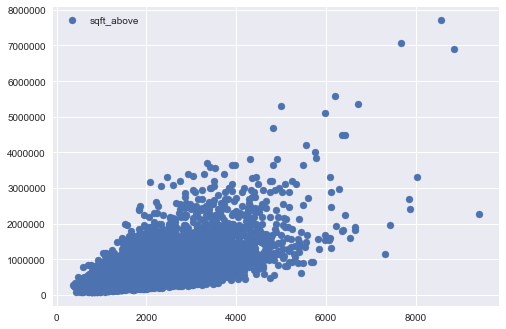

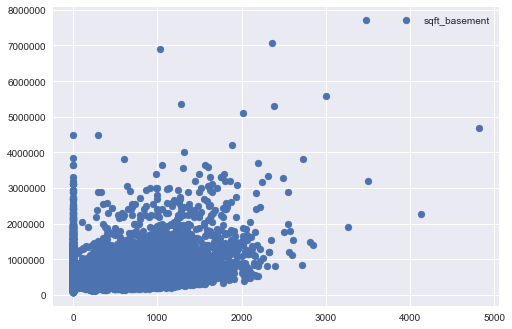

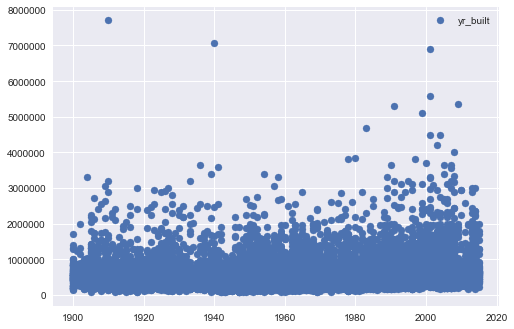

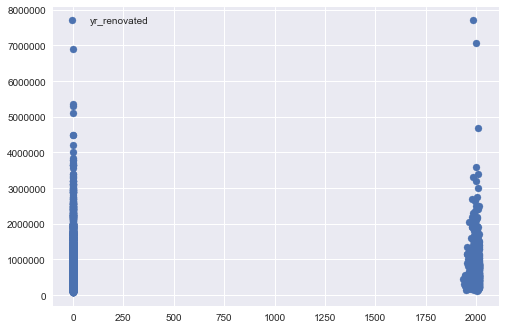

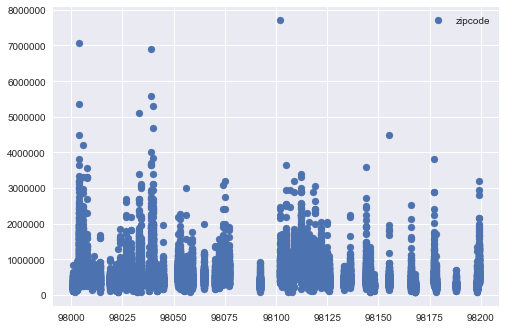

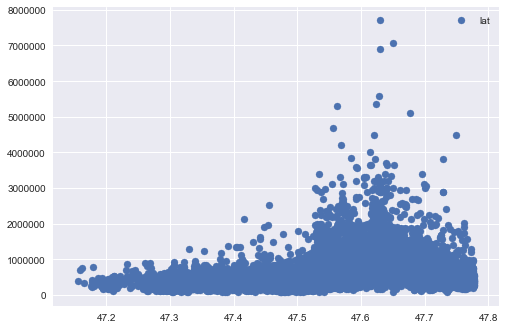

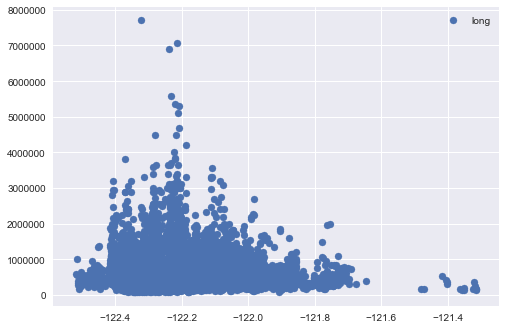

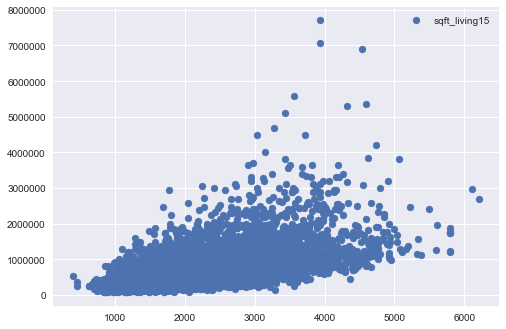

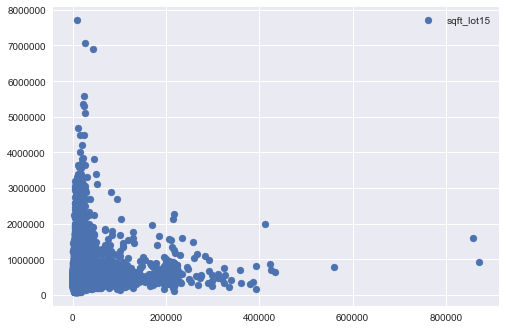

In [7]:
for column in l_of_col:
    plt.scatter(data[column], data.price, label=column)
    plt.legend()
    plt.show()

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
outcome = 'price'
predictors = data.drop(outcome, axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2127.
Date:                Fri, 20 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:44:58   Log-Likelihood:            -2.1052e+05
No. Observations:               15429   AIC:                         4.211e+05
Df Residuals:                   15411   BIC:                         4.212e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.409e+06   3.52e+06      1.536      0.124   -1.49e+06    1.23e+07
bedrooms      -3.711e+04   2247.798    -16.509      0.000   -4.15e+04   -3.27e+04
bathrooms      4.377e+04   3911.242     11.191      0.000    3.61e+04    5.14e+04
sqft_living     115.6390      2.711     42.658      0.000     110.325     120.953
sqft_lot          0.0940      0.057      1.663      0.096      -0.017       0.205
floors         4472.7336   4330.316      1.033      0.302   -4015.197     1.3e+04
waterfront     6.193e+05   2.09e+04     29.617      0.000    5.78e+05     6.6e+05
view           5.345e+04   2586.926     20.662      0.000    4.84e+04    5.85e+04
condition       2.65e+04   2820.455      9.397      0.000     2.1e+04     3.2e+04
grade          9.373e+04   2603.075     36.009      0.000    8.86e+04    9.88e+04
sqft_above       76.6684      2.694     28.457      0.000      71.387      81.949
sqft_basement    38.9692      3.153     12.358      0.000      32.788      45.150
yr_built      -2679.4942     87.114    -30.758      0.000   -2850.249   -2508.740
yr_renovated     20.2559      4.434      4.568      0.000      11.564      28.947
zipcode        -569.9142     39.551    -14.409      0.000    -647.440    -492.389
lat            6.025e+05   1.29e+04     46.885      0.000    5.77e+05    6.28e+05
long          -2.163e+05   1.58e+04    -13.698      0.000   -2.47e+05   -1.85e+05
sqft_living15    16.6278      4.156      4.001      0.000       8.482      24.774
sqft_lot15       -0.3398      0.086     -3.948      0.000      -0.509      -0.171
==============================================================================
Omnibus:                    13379.352   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1462397.083
Skew:                           3.654   Prob(JB):                         0.00
Kurtosis:                      50.132   Cond. No.                     8.00e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.44e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

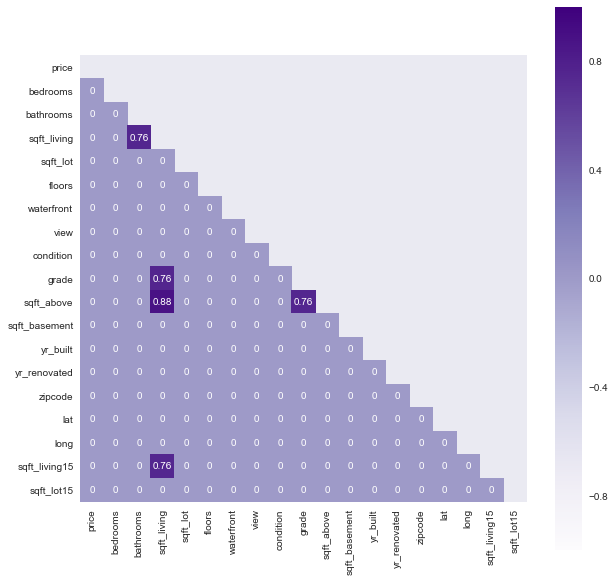

In [9]:
import seaborn as sns
plt.figure(figsize=(10, 10))
data_corr = data.corr()
data_corr[np.abs(data_corr)<.75] = 0
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_corr, mask=mask, center=0, annot=True, cmap="Purples", square = True, vmin=-1)

In [10]:
data.waterfront = data.waterfront.fillna(0, inplace=False)
data.view = data.view.fillna(data.view.mean(), inplace=False)
data.yr_renovated = data.yr_renovated.fillna(0, inplace=False)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.000000,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.000000,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.000000,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.000000,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.000000,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.000000,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
7,291850.0,3,1.50,1060,9711,1.0,0.0,0.233327,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0.0,0.000000,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0.0,0.000000,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
10,662500.0,3,2.50,3560,9796,1.0,0.0,0.000000,3,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925


In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
outcome = 'price'
predictors = data.drop(outcome, axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2905.
Date:                Fri, 20 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:44:59   Log-Likelihood:            -2.8823e+05
No. Observations:               21143   AIC:                         5.765e+05
Df Residuals:                   21125   BIC:                         5.766e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.995e+06   2.96e+06      2.360      0.018    1.18e+06    1.28e+07
bedrooms      -3.596e+04   1925.405    -18.674      0.000   -3.97e+04   -3.22e+04
bathrooms      4.126e+04   3304.377     12.488      0.000    3.48e+04    4.77e+04
sqft_living     110.5829      2.303     48.015      0.000     106.069     115.097
sqft_lot          0.1154      0.049      2.358      0.018       0.019       0.211
floors         7200.0580   3649.288      1.973      0.049      47.175    1.44e+04
waterfront     6.252e+05   1.84e+04     33.979      0.000    5.89e+05    6.61e+05
view           5.403e+04   2149.062     25.141      0.000    4.98e+04    5.82e+04
condition      2.698e+04   2374.267     11.363      0.000    2.23e+04    3.16e+04
grade          9.663e+04   2184.929     44.225      0.000    9.23e+04    1.01e+05
sqft_above       70.5235      2.278     30.953      0.000      66.058      74.989
sqft_basement    40.0636      2.681     14.943      0.000      34.809      45.319
yr_built      -2640.9747     72.893    -36.231      0.000   -2783.851   -2498.098
yr_renovated     23.6754      4.036      5.867      0.000      15.765      31.585
zipcode        -587.7806     33.385    -17.606      0.000    -653.217    -522.344
lat            6.004e+05   1.09e+04     55.262      0.000    5.79e+05    6.22e+05
long          -2.177e+05   1.33e+04    -16.344      0.000   -2.44e+05   -1.92e+05
sqft_living15    21.9409      3.486      6.294      0.000      15.108      28.773
sqft_lot15       -0.3787      0.075     -5.064      0.000      -0.525      -0.232
==============================================================================
Omnibus:                    17942.418   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1801893.101
Skew:                           3.556   Prob(JB):                         0.00
Kurtosis:                      47.663   Cond. No.                     3.74e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.53e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

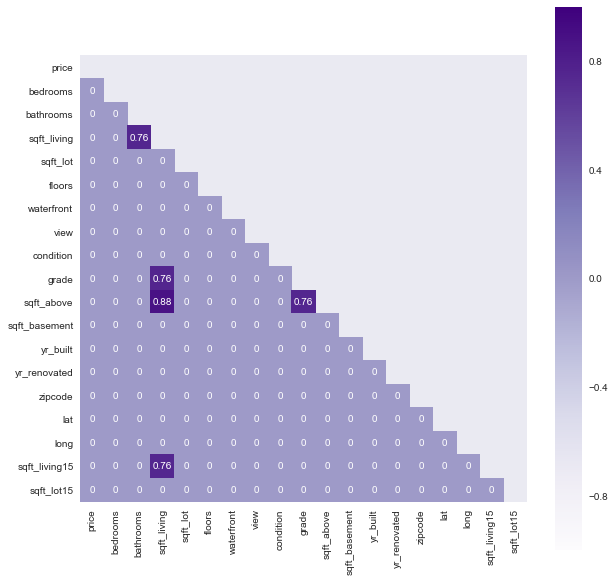

In [12]:
import seaborn as sns
plt.figure(figsize=(10, 10))
data_corr = data.corr()
data_corr[np.abs(data_corr)<.75] = 0
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_corr, mask=mask, center=0, annot=True, cmap="Purples", square = True, vmin=-1)

In [13]:
new_l_of_col = l_of_col
new_l_of_col.remove('sqft_living')
new_l_of_col.remove('sqft_above')
new_data = data[new_l_of_col].copy()
new_data.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
outcome = 'price'
predictors = new_data.drop(outcome, axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=new_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     2641.
Date:                Fri, 20 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:44:59   Log-Likelihood:            -2.8936e+05
No. Observations:               21143   AIC:                         5.787e+05
Df Residuals:                   21126   BIC:                         5.789e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.423e+07   3.12e+06      4.558      0.000    8.11e+06    2.04e+07
bedrooms      -6731.9087   1929.797     -3.488      0.000   -1.05e+04   -2949.360
bathrooms      9.201e+04   3307.659     27.818      0.000    8.55e+04    9.85e+04
sqft_lot          0.2661      0.051      5.167      0.000       0.165       0.367
floors          3.49e+04   3801.991      9.181      0.000    2.75e+04    4.24e+04
waterfront     6.678e+05   1.94e+04     34.455      0.000     6.3e+05    7.06e+05
view           5.254e+04   2266.420     23.183      0.000    4.81e+04     5.7e+04
condition      2.447e+04   2503.587      9.775      0.000    1.96e+04    2.94e+04
grade          1.386e+05   2118.335     65.411      0.000    1.34e+05    1.43e+05
sqft_basement    57.8728      4.241     13.645      0.000      49.560      66.186
yr_built      -3179.4568     75.994    -41.839      0.000   -3328.410   -3030.504
yr_renovated     22.7451      4.256      5.344      0.000      14.402      31.088
zipcode        -543.3683     35.198    -15.437      0.000    -612.359    -474.377
lat             5.61e+05   1.14e+04     49.097      0.000    5.39e+05    5.83e+05
long           -1.44e+05    1.4e+04    -10.316      0.000   -1.71e+05   -1.17e+05
sqft_living15    89.6160      3.372     26.573      0.000      83.006      96.226
sqft_lot15       -0.1844      0.079     -2.341      0.019      -0.339      -0.030
==============================================================================
Omnibus:                    20715.222   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3397185.011
Skew:                           4.371   Prob(JB):                         0.00
Kurtosis:                      64.480   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Tried to take out grade over sft_above. We recieved a result of a higher R-sqaured and lower Cond. No.; however, our intercept p-value was insignificatn and we could not reject our null hypothesis of the intercept equalling 0.